**Hands-on Activity 4.3 Instance Segmentation on Custom Dataset**

---



**Manolito Jr. B. Aquino** <br>
**CPE 313-CPE32S8 - Advanced Machine Learning and Deep Learning** <br>
**Engr. Roman Richard**

# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [2]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [14]:
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/78.2 GB disk)


In [3]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 57.1MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 105MB/s] 

100%|██████████| 42.4M/42.4M [00:00<00:00, 128MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 147MB/s]

100%|██████████| 170M/170M [00:01<00:00, 142MB/s]



***In this step, I managed to follow without issues. I successfully cloned the necessary github repository that consists of the required tools. I was also able to download different pretrained weights***

# 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 56.2ms
Speed: 0.8ms pre-process, 56.2ms inference, 682.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference


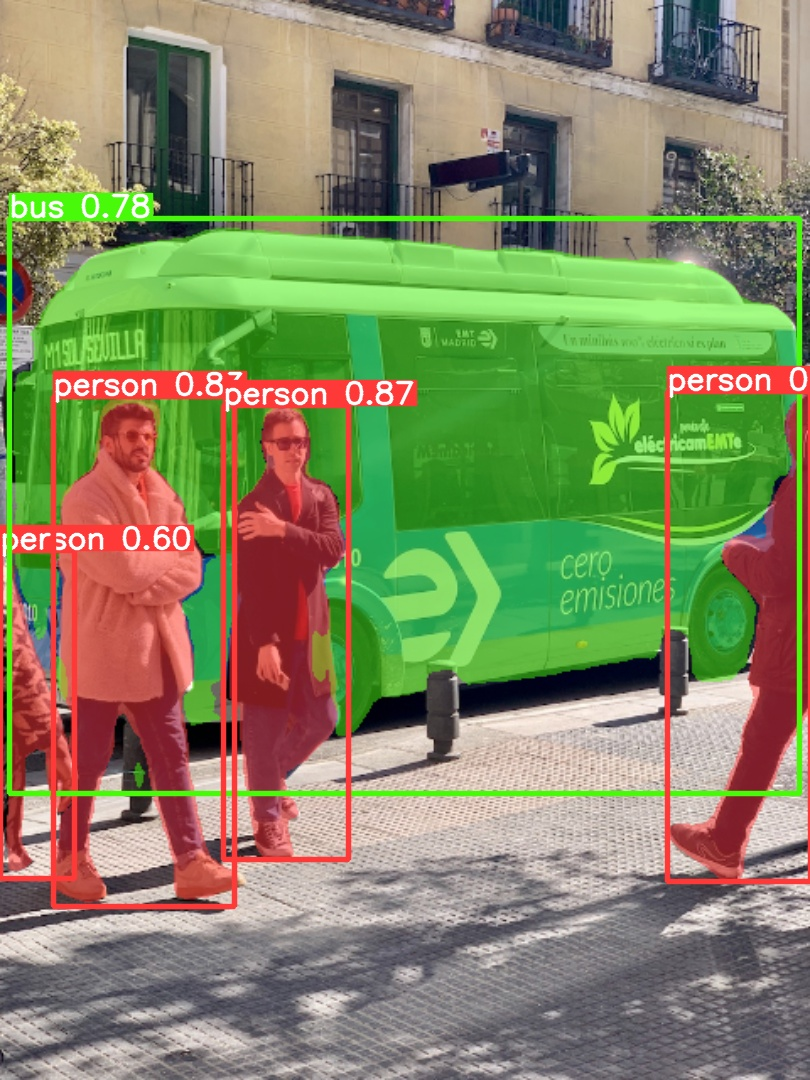

In [4]:
# infer using segment/predict.py

%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference/bus.jpg", width=600)

***Here I understood how instance segmentation works. Using pretrained weights and models that was trained on Common Objects in Context dataset. We were able to detect the presence of people and a bus in the picture.***

# 2. Infer on COCO image

In [34]:
#Download example image
'''
import requests
image_url = "https://i.imgur.com/EbOBS5l.jpg"
response = requests.get(image_url)
response.raise_for_status()
with open(f"{HOME}/yolov5/data/images/zebra.jpg", "wb") as handler:
    handler.write(response.content)
'''

'\nimport requests\nimage_url = "https://i.imgur.com/EbOBS5l.jpg"\nresponse = requests.get(image_url)\nresponse.raise_for_status()\nwith open(f"{HOME}/yolov5/data/images/zebra.jpg", "wb") as handler:\n    handler.write(response.content)\n'

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/yolov5/data/images/zebra.jpg: 448x640 1 zebra, 55.5ms
Speed: 0.6ms pre-process, 55.5ms inference, 513.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco


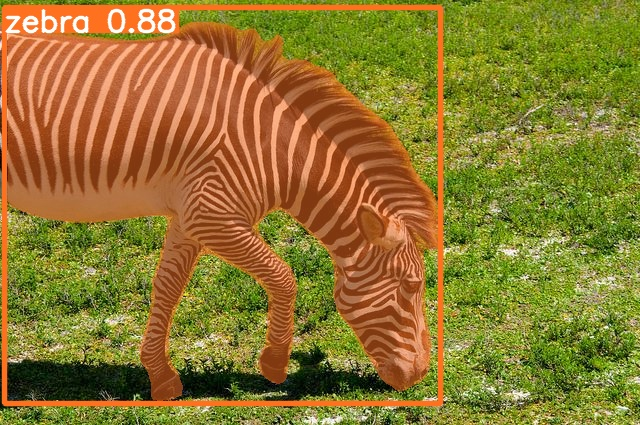

In [5]:
#Infer using segment/predict.py
%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco/zebra.jpg", width=600)

***Here we can see that an image gathered from imgur. Notice that I commented out the block of code for downloading directly from imgur. This is because there has been a repeated occurence of service error. I decided to download it manually. Then we can see that the model successfully detected the zebra with confidence of 88***

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [ ]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q {HOME}/tmp.zip -d {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

100%|██████████| 6.79M/6.79M [00:00<00:00, 87.6MB/s]


In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.9M/14.9M [00:00<00:00, 138MB/s]

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

Dataset not found ⚠️, missing paths ['/content/datasets/coco128-seg/images/train2017']
100% 6.79M/6.79M [00:00<00:00, 88.6MB/s]
Dataset download success ✅ (0.7s), saved to /content/datasets
val: Scanning /content/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 1071.05it/s]
val: New cache created: /content/datasets/coco128

The output shows performance metrics for the COCO-128 validation dataset.

# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [9]:
%cd {HOME}/yolov5

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6A6Ru8ArH4jPGDS8PXro")
project = rf.workspace("xuetong-zhong").project("bread0330")
version = project.version(2)
dataset = version.download("yolov5")



/content/yolov5
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BREAD0330-2 in yolov5pytorch:: 100%|██████████| 1182/1182 [00:00<00:00, 6930.29it/s]


***Here I decided to use a dataset from roboflow that detects a bread in a frame. I exported the dataset for YOLOV5 in PyTorch***

In [10]:
%cat {dataset.location}/data.yaml

names:
- bread
nc: 1
roboflow:
  license: CC BY 4.0
  project: bread0330
  url: https://universe.roboflow.com/xuetong-zhong/bread0330/dataset/2
  version: 2
  workspace: xuetong-zhong
test: ../test/images
train: BREAD0330-2/train/images
val: BREAD0330-2/valid/images


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [11]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset


/content/yolov5
2024-03-30 07:41:34.987139: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 07:41:34.987192: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 07:41:34.988723: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/BREAD0330-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=Fal

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

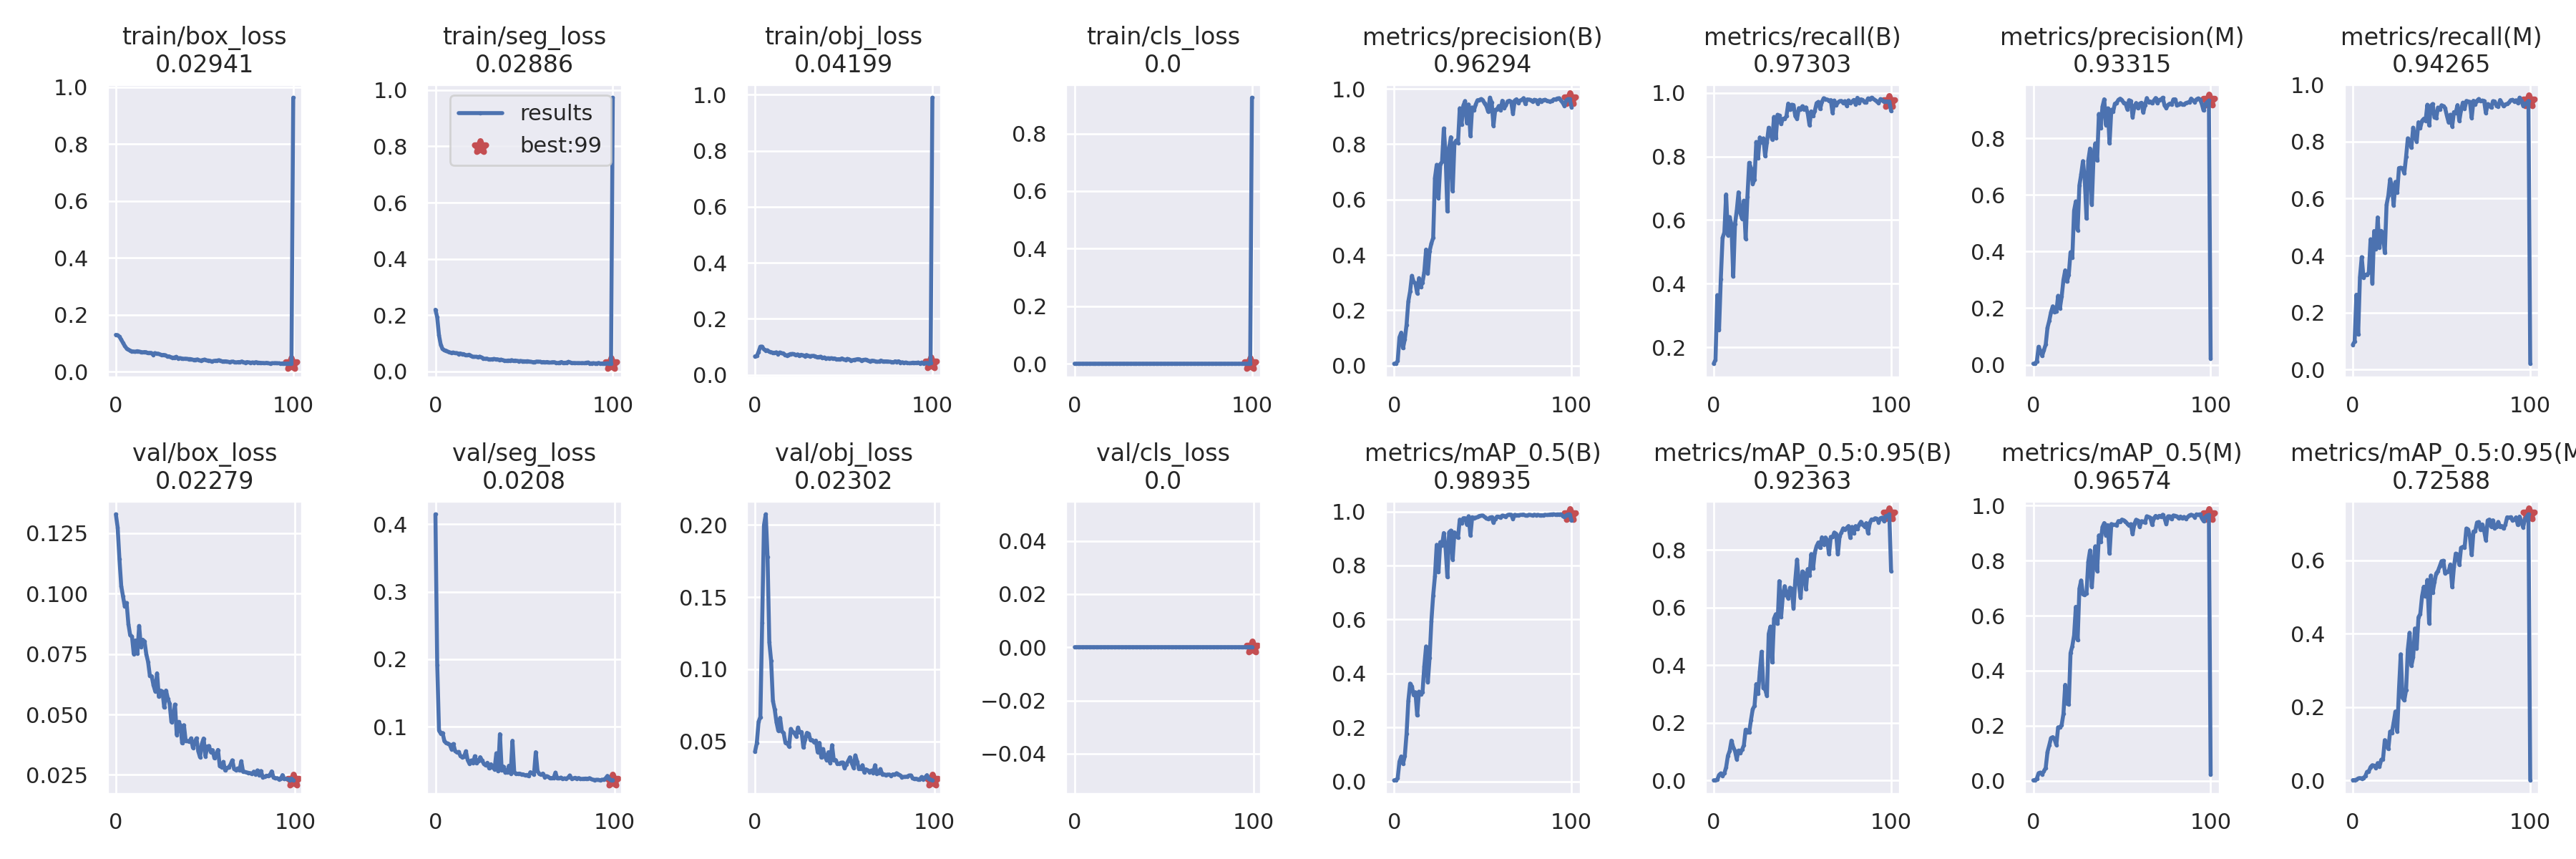

In [16]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset2/results.png', width=1200)

***We can see here how the training of the model progress through the training epochs. We can see that the loss drops down little by little. The precision and recall could also be also observed to improve.***

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [18]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/BREAD0330-2/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/BREAD0330-2/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100% 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:18<00:00,  4.65s/it]
                   all        117       1629      0.963      0.973     

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/BREAD0330-2/test/images/20240328_173140_mp4-0212_jpg.rf.b3d5712e7d15f972488ad84dc4452e5b.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/BREAD0330-2/test/images/20240328_173140_mp4-0212_jpg.rf.b3d5712e7d15f972488ad84dc4452e5b.jpg: 3

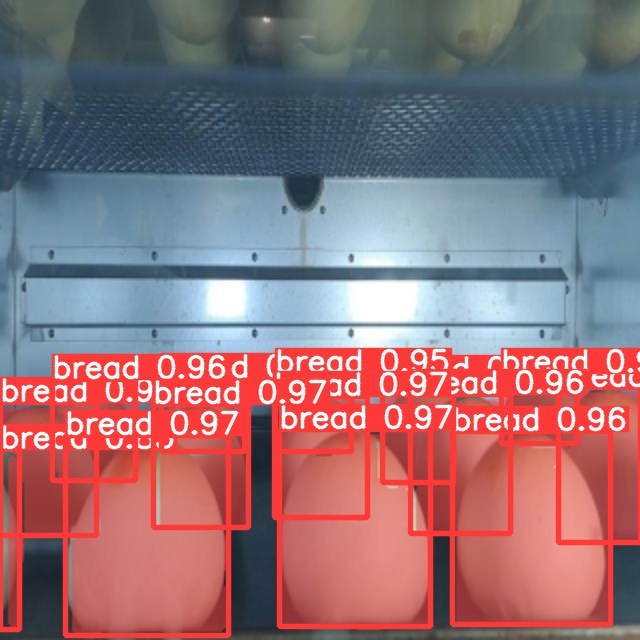

In [21]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset3/{example_image_name}", width=600)

***We can see here how it works in identifying breads inside an oven. It shows the classification with its confidence level.***

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [24]:
import requests

#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
example_image_dir = "../example_images"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.

'''
os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://i.imgur.com/rFsDnHC.jpg",
    "https://i.imgur.com/aEcceXm.jpg",
    "https://i.imgur.com/s4N63fx.jpg",
    ]

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)
'''

'\nos.makedirs(example_image_dir, exist_ok=True)\nimage_urls = [\n    "https://i.imgur.com/rFsDnHC.jpg",\n    "https://i.imgur.com/aEcceXm.jpg",\n    "https://i.imgur.com/s4N63fx.jpg",\n    ]\n\nfor i, image_url in enumerate(image_urls):\n    response = requests.get(image_url)\n    response.raise_for_status()\n    with open(os.path.join(example_image_dir,f\'example_{i}.jpg\'), \'wb\') as handler:\n        handler.write(response.content)\n'

In [27]:
#Infer On Directory
!python segment/predict.py --img 320 --weights runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['runs/train-seg/custom-dataset2/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/example_images/breads.jpg: 224x320 1 bread, 55.1ms
Speed: 0.4ms pre-process, 55.1ms inference, 552.3ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/exp3
1 labels saved to runs/predict-seg/exp3/labels


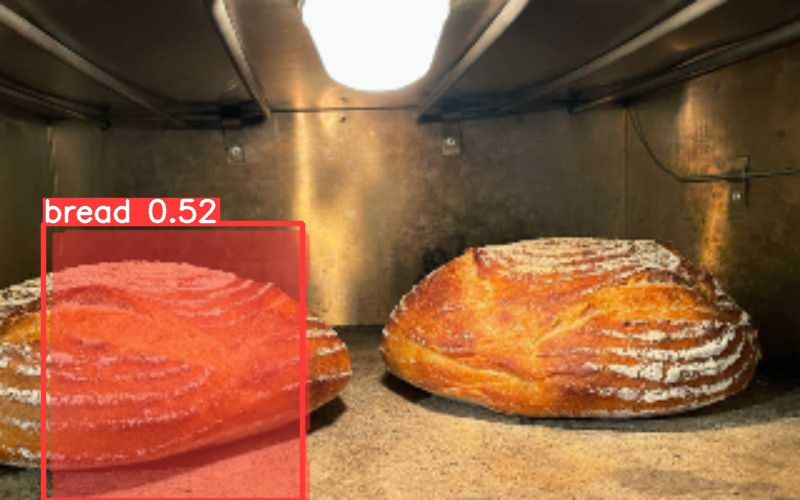

In [30]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp3/breads.jpg", width=600)

In [32]:
!python segment/predict.py --img 320 --weights runs/train-seg/custom-dataset2/weights/best.pt --source /content/example_images/bread1.jpg --save-txt --save-conf


segment/predict: weights=['runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/example_images/bread1.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/example_images/bread1.jpg: 320x224 12 breads, 57.4ms
Speed: 0.5ms pre-process, 57.4ms inference, 555.0ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/predict-seg/exp5
1 labels saved to runs/predict-seg/exp5/labels


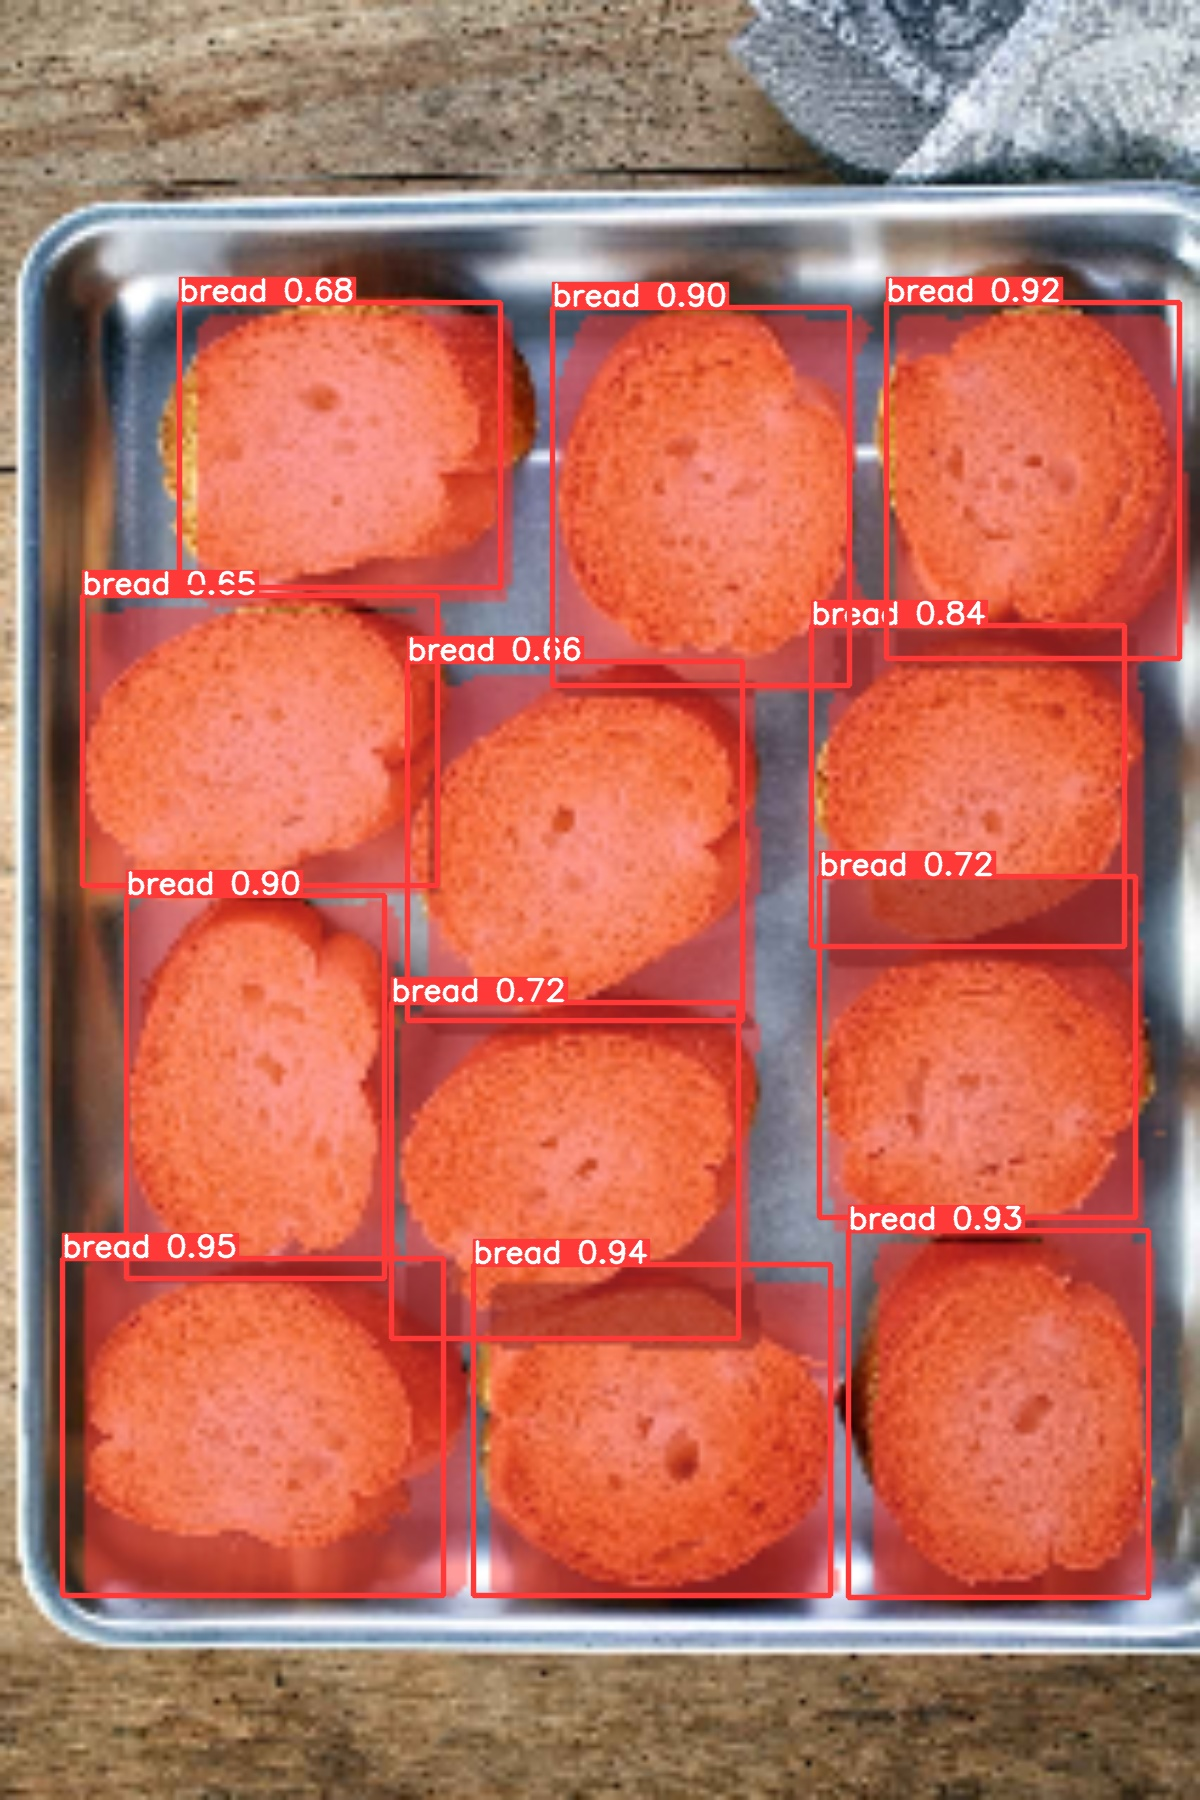

In [33]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp4/bread1.jpg", width=600)

***Here we once again commented out a block of code because we fail fetching contents from imgur using requests library. What I did is i just downloaded new images from google of breads. We can see that the model was still able to identify breads with a range of confidence.***

# Conclusion

***At first, this activity has been really confusing due to the fat that it was in PyTorch and not the usual Keras. Though, while continously reading the instructions and following it, I had the grasp of the process. I was not able to fully comprehend how the tools such as the predict.py val.py works internally but I learned how to successfully use it especially the train.py. I was stucked once in that training for a long time, I realized that I made a mistake of using a dataset which is only for object detection and not instance segmentation. I was able to correct this mistake and still train my own model.***